# SN II Explosion Time from Optical Spectra

## 1) Background

The explosion time ($t_0$) of an SN can be estimated by means of photometric information; it can be constrained between the last non-detection and the first detection, or estimated through a polynomial fit to the rise-time photometry when it is available. The spectroscopy of an SN can also provide information about its explosion epoch by means of the comparison with other spectra of SNe with explosion epoch estimated through photometric information.

In [Rodríguez et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5459R/abstract) I developed an automated routine to compute the probability density function (pdf) of $t_0$ given a set of input optical spectra, called **SNII Explosion Time from Optical Spectra (SNII_ETOS)**. This routine makes use of the Supernova Identificator code (SNID; [Blondin & Tonry 2007](https://ui.adsabs.harvard.edu/abs/2007ApJ...666.1024B/abstract)), which finds by cross-correlation the spectra from a certain template library that are more similar to the input spectrum. In [Rodríguez et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5459R/abstract) I also compiled a template library using optical spectra of 59 SNe II with $t_0$ constrained within 10 days by photometric information (details of the template library are available [here](https://github.com/olrodrig/SNII_ETOS/tree/master/docs/R19_tableF6.pdf)). These spectra are at epochs earlier than 40 days since explosion and have information in the range between 4100 and 7000 angstrom. Therefore, to compute $t_0$ with the **SNII_ETOS** code it is necessary that the input spectra: (1) be defined between 4100 and 7000 angstrom, and (2) be as early as possible (at least 40 days earlier than the first detection).

For any question, email me at olrodrig@gmail.com

**If you use the SNII_ETOS code in your work, please cite [Rodríguez et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.5459R/abstract).**

## 2) Installation

The **SNII_ETOS** code does not require installation, but it has dependencies that must be satisfied.

### 2.1) Dependencies

The **SNII_ETOS** code is written on Python 3, so you have to install it (in Ubuntu: apt install python3). In addition, you need to install numpy (version 1.15.0 or newer), sklearn (version 0.18.1 or newer), and matplotlib (version 2.2.4 or newer). To install them with pip3: `pip3 install numpy scikit-learn matplotlib`. You also need to install SNID (the code and installation instructions are available in [this](https://people.lam.fr/blondin.stephane/software/snid/index.html) link).

### 2.2) Loading SNII_ETOS

Assuming that the **SNII_ETOS** Python files are in the directory `/path/tofiles`, you have to include the following lines in your code

`import sys
sys.path.append(/path/tofiles)
from SNII_ETOS import Explosion_Time_from_Optical_Spectra`

## 3) Description

The unique class in **SNII_ETOS** is Explosion_Time_from_Optical_Spectra.

`Explosion_Time_from_Optical_Spectra(templates_path, sn, z, JD_spectra, wl_spectra, f_spectra, JD_fd, JD_ln=-9999, snid_verbose=False, display_snid_plots=False)`

### Parameters:

- **templates_path: string.** Directory where the SNID templates are.
- **sn: string.** Name of the input SN.
- **z: float.** Heliocentric redshift of the input SN.
- **JD_spectra: array-like.** Array containing the Julian dates of the input spectra.
- **wl_spectra: array-like.** Array containing the wavelengths of the input spectra. Wavelengths must be in angstrom.
- **f_spectra: array-like.** Array containing the fluxes of the input spectra.
- **JD_fd: float.** Julian date of the first detection of the SN.
- **JD_ln: float, optional (default: -9999).** Julian date of the last non-detection of the SN.
- **snid_verbose: bool, optional (default: False).** Whether or not show the SNID terminal outputs.
- **display_snid_plots: bool, optional (default: False).** Whether or not show the SNID plots.

### Attributes:

- **sn: string.** Name of the input SN.
- **z: float.** Heliocentric redshift of the input SN.
- **JD_fd: float.** Julian date of the first detection of the SN.
- **JD_ln: float.** Julian date of the last non-detection of the SN.
- **n_spec: integer.** Number of spectra used to compute the explosion time.
- **x_pdf: array-like.** List of values, corresponding to (t-JD_fd)/(1+z), used to evaluate different pdf's.
- **pdf: dictionary.** Dictionary containing different explosion time pdf's. Keys are: "fd+ln" for the uniform pdf between JD_fd and JD_ln, "snid" for the SNID pdf, "snid+fd" for the SNID pdf with JD_fd as prior, and "snid+fd+ln" for the SNID pdf with JD_fd and JD_ln as priors.
- **JD_t0: dictionary.** Dictionary containing the explosion time, in the observer's frame, computed with different pdf's (keys are the same than for **pdf**) and with different methods: "mean", "median", and "mode".
- **rms_JD_t0: dictionary.** Dictionary containing the rms error of JD_t0. Keys are the same than for **JD_t0**.

### Methods:

`plot(figure_name="")`

Plot different stages in the estimation of the explosion time.

**Parameter:**
- **figure_name: string (default:"").** Name of the output figure. If figure_name is not an empty string, then the figure is saved as a pdf file.

`random_values(pdf_name, N)`

Generate N random values from a given pdf.

**Parameter:**
- **pdf_name: string.** Name of the pdf to use. It can be "fd+ln", "snid", "snid+fd", or "snid+fd+ln".
- **N: integer.** Number of values to extract from the pdf.

**Return:**
- **JD_t0s: array-like.** Array of explosion times drawn from the given pdf.

`pc_boundaries(pdf_name, method, percent)`

Estimate the boundaries enclosing a certain per cent of a given pdf.

**Parameter:**
- **pdf_name: string.** Name of the pdf to use. It can be "fd+ln", "snid", "snid+fd", or "snid+fd+ln".
- **method: string.** Method to estimate the central value. It can be "mean", "median", or "mode".
- **percent: float.** Per cent of the values. It can be a value between 0 and 100.

**Returns:**
- **boundaries: array-like.** Array with the boundaries.

## 4) Example

The **SNII_ETOS** Python files are in the folder called `src`, which is in the same parent directory of the folder with this tutorial. Then, to load the class Explosion_Time_from_Optical_Spectra, we have to execute

In [1]:
import sys
sys.path.append('../src')
from SNII_ETOS import Explosion_Time_from_Optical_Spectra

The SNID templates for the **SNII_ETOS** code are in the folder called `SNID_templates`, which is in the same parent directory of the folder with this tutorial. So we define

In [2]:
templates_path = '../SNID_templates'

To make this tutorial easier to follow, I created the routine `read_example_spectroscopy` (which is not part of the **SNII_ETOS** code) to read the example spectroscopy

In [3]:
from read_example_spectroscopy import read_example_spectroscopy

For this example, we will work with the SN II 1999ca. The redshift, JD of the first detection and last non-detection of the SN are as follow

In [4]:
sn, z, JD_fd, JD_ln = '1999ca', 0.0093, 2451296.05, 2451270.5

We read the spectroscopy (published in [Gutiérrez et al. 2017](https://ui.adsabs.harvard.edu/abs/2017ApJ...850...89G/abstract))

In [5]:
#don't worry about how read_example_spectroscopy works.
JD_spectra, wl_spectra, f_spectra = read_example_spectroscopy(sn)

Number of input spectra: 3


For SN 1999ca we have 3 spectra, which we will use as input. To estimate the explosion epoch with the **SNII_ETOS** code, just run

In [6]:
ETOS = Explosion_Time_from_Optical_Spectra(templates_path, sn, z, JD_spectra, wl_spectra, f_spectra, JD_fd, JD_ln=JD_ln)

Discarding spectrum at JD=2451317.545: it is at >40 days since explosion.


As we can see, spectra at epochs greater than 40 days since explosion are automatically ruled out. (If you want to see graphically the best-match found by SNID, set `display_snid_plots=True`)

To obtain the explosion time, we use the attribute `JD_t0`, where we have to specify the pdf (in our case, "snid") and the method to compute the most probable value. Let's try with "median"

In [7]:
ETOS.JD_t0["snid"]["median"]

2451271.25

while to obtain the rms error of the computed explosion time, we execute

In [8]:
ETOS.rms_JD_t0["snid"]["median"]

4.56

We can check the different stages in the estimation of the explosion epoch executing

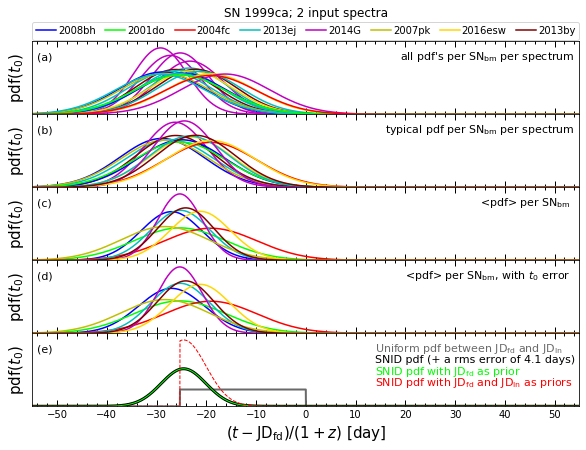

In [9]:
ETOS.plot()

(The explanation of each panel in the figure is in Section 5). The bottom panel of the figure shows the combined SNID pdf (black line) for the explosion time. In order to obtain a better constrained estimation of the explosion time, we can combine the SNID pdf with the prior uniform pdf (gray line) given by the last non-detection and the first detection of the SN. For example, combining the SNID pdf with the prior pdf (red dashed line), we obtain

In [10]:
ETOS.JD_t0["snid+fd+ln"]["median"], ETOS.rms_JD_t0["snid+fd+ln"]["median"]

(2451273.87, 2.94)

As expected, the rms is lower than for the SNID pdf without priors. However, the pdf is assymetric, so the rms is not a good indicator for the error. Instead, we can use the boundaries that contain, for example, the 80% of probability

In [11]:
ETOS.pc_boundaries("snid+fd+ln", "median", 80.0)-ETOS.JD_t0["snid+fd+ln"]["median"]

array([-2.72,  4.6 ])

so we can write the explosion time for SN 1999ca as JD $2451273.87_{-2.72}^{+4.60}$ . 

Since the "snid+fd+ln" pdf (red dashed line) is quite assymetric, it could be better to use the "mode" to obtain $t_0$ as the most probable value

In [12]:
ETOS.JD_t0["snid+fd+ln"]["mode"], ETOS.pc_boundaries("snid+fd+ln", "mode", 80.0)-ETOS.JD_t0["snid+fd+ln"]["mode"]

(2451271.25, array([-0.75,  5.52]))

so we can adopt JD $2451271.25_{-0.75}^{+5.52}$ as the explosion time for SN 1999ca.

Finally, if you want to propagate this assymetric error through simulation, use `random_values` to pick values from an specific pdf. For example,

In [13]:
ETOS.random_values("snid+fd+ln",10)

array([2451276.802649, 2451283.474122, 2451276.67144 , 2451277.842228,
       2451277.448601, 2451274.592282, 2451280.698547, 2451270.898244,
       2451275.339164, 2451271.877265])

## 5) How SNII_ETOS works

In order to see how **SNII_ETOS** works, let's plot again the figure with the different stages for the $t_0$ estimation

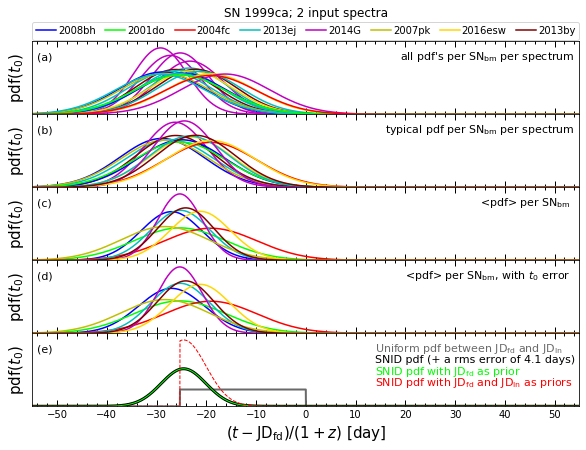

In [14]:
ETOS.plot()

The procedure performed by **SNII_ETOS** is as follow:

1) Given an input SN at redshift $z$, first detected at $\mathrm{JD}_\mathrm{fd}$, and with $N$ optical spectra earlier than 40 days since $\mathrm{JD}_\mathrm{fd}$, **SNII_ETOS** runs SNID for each spectrum. The SNID output for each of the $N$ spectra is a list with the best-matching templates, their phase since explosion, and their $r\mathrm{lap}$ parameter (which indicates the strength of the correlation). From each of the $N$ lists, **SNII_ETOS** selects the first 10 best-matching templates with $r\mathrm{lap}>5.0$. The SNID phases since explosion ($t_\mathrm{SNID}$) of a given spectrum observed at $\mathrm{JD}_\mathrm{spec}$ are converted to explosion times (since the first detection) using $t_0=(\mathrm{JD}_\mathrm{spec}-\mathrm{JD}_\mathrm{fd})/(1+z)-t_\mathrm{SNID}$, while the $r\mathrm{lap}$ values are converted to rms errors on $t_0$ using the formula $\mathrm{rms}(t_0)=3.0+72.0/r\mathrm{lap}-75.0/r\mathrm{lap}^2$ days. The $10\cdot N$ normal pdf's are plotted in panel (a).

2) From the results of each of the $N$ spectra, **SNII_ETOS** extracts a sublist for each of the $M$ best-matching SNe ($\mathrm{SN}_\mathrm{bm}$). With each of the $M$ sublists, **SNII_ETOS** computes the $t_0$ as the average, taking the standard deviation as the associated error. The $N\cdot M$ normal pdf's are plotted in panel (b).

3) For each $\mathrm{SN}_\mathrm{bm}$, **SNII_ETOS** computes $t_0$ as a weighted average of the $t_0$ results from the $N$ spectra. The $M$ normal pdf's are plotted in panel (c).

4) For each $\mathrm{SN}_\mathrm{bm}$, **SNII_ETOS** includes the uniform $t_0$ error of the $\mathrm{SN}_\mathrm{bm}$ through a Monte Carlo error propagation. In order to express the new pdf's analytically, **SNII_ETOS** models them as a Gaussian mixture. The $M$ pdf's are plotted in panel (d). 

5) Finally, the $t_0$ pdf's obtained with each $\mathrm{SN}_\mathrm{bm}$ are combined into a single one, called "snid" pdf. **SNII_ETOS** includes a rms error of 5.0 (4.1) days if only one spectrum is (two or more spectra are) given as input. In order to further constrain the value of $t_0$, **SNII_ETOS** combines the "snid" pdf with $\mathrm{JD}_\mathrm{fd}$ as prior, which is called "snid+fd" pdf. If an epoch of last non-detection ($\mathrm{JD}_\mathrm{ln}$) is available, then **SNII_ETOS** combines the "snid" pdf with $\mathrm{JD}_\mathrm{fd}$ and $\mathrm{JD}_\mathrm{ln}$ as priors (assuming a uniform distribution between $\mathrm{JD}_\mathrm{fd}$ and $\mathrm{JD}_\mathrm{ln}$), which is called "snid+fd+ln" pdf. The latter pdf's are plotted in panel (e).

